Renderer(camera=OrthographicCamera(bottom=-200.0, children=(DirectionalLight(intensity=0.7, position=(0.0, 100…

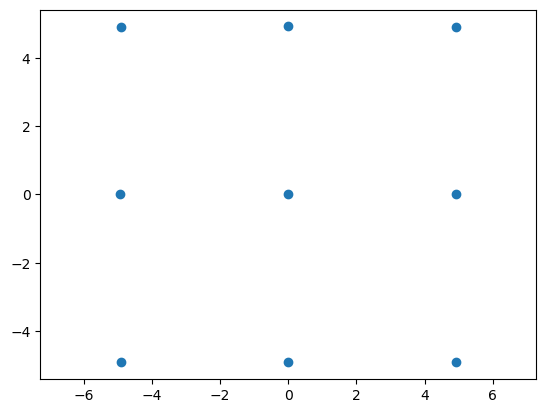

In [4]:
from pyoptools.all import *
from math import pi


L2=SphericalLens(radius=25,
                 curvature_s1=1./100., #surface1 (convex)
                 curvature_s2=-1./100, #surface2 (concave)
                 thickness=10, #lens thickness (mm)
                 material=material.schott["N-BK7"]) #lens material from Schott catalog (can also use material from other sites)

C=CCD() #detector no specific size, to give size: "CCD = CCD(size=(10, 10))"

L2_location=(0,0,100) #position of lens L2
CCD_location=(0,0,215) 
S=System(complist=[(L2,L2_location,(0,0,0)),(C, CCD_location, (0,0,0))],n=1)
#S=optical system and components and their spatial orientations
#S=System(complist=[(name,location,rotation), (other components)], refractive index(n))
#L1 and CCD have no rotation here, you can add rotation by changing the zeros
#n is the refractive index equals to air here

R=[] #list to store generated rays
for x in range(-25,35,5): 
    for y in range(-25,35,5):
        R.append(Ray(pos=(0,0,0),dir=(x,y,100),wavelength=.650))
                    #pos=origin of rays, dir=propagation direction
S.ray_add(R) #adds all generated rays to the optical system, S here
S.propagate() #propagates rays

spot_diagram(C) #displays spot diagram on the CCD
Plot3D(S,center=(0,0,100),size=(250,100),scale=4,rot=[(0,pi/2,0),(pi/20,-pi/10,0)])
#3D visualization, center view of lens, size of viewing window, zoom scale, rotation view, last is tilt (all parameters not necessary)